In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [5]:
 # Step 1: Load and preprocess the data
df = pd.read_excel("D:\\projects\\project 1st oil price predection\\DCOILWTICO (1).xls")

In [6]:
df

,Date,Price
0,2012-04-02,105.25
1,2012-04-03,104.02
2,2012-04-04,101.53
3,2012-04-05,103.29
4,2012-04-06,NaN
...,...,...
2916,2023-06-06,71.71
2917,2023-06-07,72.52
2918,2023-06-08,71.28
2919,2023-06-09,70.16


In [7]:
# Step 2: Preprocessing
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Handle missing values and negative values
df['Price'] = df['Price'].replace({0: np.nan, -1: np.nan})
df['Price'].fillna(method='ffill', inplace=True)

# Transform to stationary format (if needed)
# You can use differencing to remove trends and make the data stationary
df['Price_diff'] = df['Price'].diff()
df.dropna(inplace=True)


In [8]:
# Step 3: Split the data into train and test sets
train_size = int(len(df) * 0.8)  # 80% for training
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]


In [9]:
# Step 4: Fit the SARIMA model
order = (1, 0, 1)  # (p, d, q)
seasonal_order = (1, 0, 1, 12)  # (P, D, Q, S)
model = SARIMAX(train_data['Price_diff'], order=order, seasonal_order=seasonal_order)
fitted_model = model.fit()


D:\anaconda softwere\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
D:\anaconda softwere\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


In [10]:
# Step 5: Make predictions
start_date = test_data.index[0]
end_date = test_data.index[-1]
predicted_diff = fitted_model.predict(start=start_date, end=end_date)
predicted_price = df['Price'].iloc[train_size] + predicted_diff.cumsum()

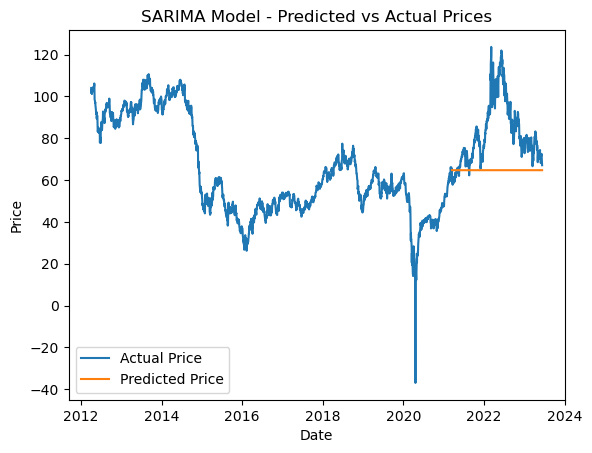

In [11]:
# Step 6: Plot the predicted prices
plt.plot(df['Price'], label='Actual Price')
plt.plot(predicted_price, label='Predicted Price')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SARIMA Model - Predicted vs Actual Prices')
plt.show()

In [12]:
# Step 7: Evaluate the model
mse = mean_squared_error(test_data['Price'], predicted_price)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 531.2672672472929
